In [1]:
!pip install simpy

In [2]:
import simpy
import random
import numpy as np

def queue_simulation(arrival_rate, service_rate, sim_time=200):
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)

    waiting_times = []

    def customer(env):
        arrival = env.now
        with server.request() as request:
            yield request
            wait = env.now - arrival
            waiting_times.append(wait)
            service_time = random.expovariate(service_rate)
            yield env.timeout(service_time)

    def source(env):
        while True:
            yield env.timeout(random.expovariate(arrival_rate))
            env.process(customer(env))

    env.process(source(env))
    env.run(until=sim_time)

    return np.mean(waiting_times)

# Example run
queue_simulation(1.2, 2.0)

np.float64(0.531773657612785)

In [3]:
import pandas as pd

data = []

for i in range(1000):
    arrival_rate = random.uniform(0.1, 2.0)
    service_rate = random.uniform(0.5, 3.0)

    avg_wait = queue_simulation(arrival_rate, service_rate)

    data.append([arrival_rate, service_rate, avg_wait])

df = pd.DataFrame(data, columns=['arrival_rate', 'service_rate', 'avg_waiting_time'])

df.head()

,arrival_rate,service_rate,avg_waiting_time
0,1.496635,1.672381,2.256102
1,1.165927,2.542513,0.180841
2,1.838727,1.939334,3.432050
3,1.362469,1.215278,10.210445
4,0.628699,1.666377,0.483821


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

X = df[['arrival_rate', 'service_rate']]
y = df['avg_waiting_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=500)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
results_df.sort_values(by="R2 Score", ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MSE,R2 Score
5,Gradient Boosting,11.415431,0.963805
4,KNN,11.484404,0.963586
2,Random Forest,13.061325,0.958586
6,Neural Network,23.021106,0.927007
1,Decision Tree,24.094600,0.923603
3,SVR,37.716527,0.880412
0,Linear Regression,131.117211,0.584264


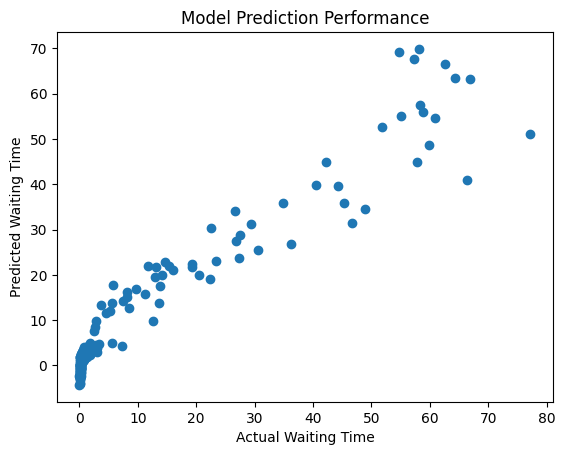

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.xlabel("Actual Waiting Time")
plt.ylabel("Predicted Waiting Time")
plt.title("Model Prediction Performance")
plt.show()